## QLIPP CALIBRATION NOTEBOOK

In [1]:
import time
import os, sys
from pycromanager import Bridge

p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import numpy as np
from recOrder.recOrder.calib.Calibration import QLIPP_Calibration
from recOrder.recOrder.calib.CoreFunctions import snap_image

In [2]:
bridge = Bridge(convert_camel_case=False)
mmc = bridge.get_core()
mm = bridge.get_studio()

calib = QLIPP_Calibration()
calib.mmc = mmc
calib.mm = mm
calib.print_details = True

### Notes Before you begin:

* Choose a field of view with no sample for calibration
* Decide whether you want a 4-State Scheme (faster) or a 5-State Scheme (slower, slightly more sensitive?)

Will Calibrate Using this ROI:


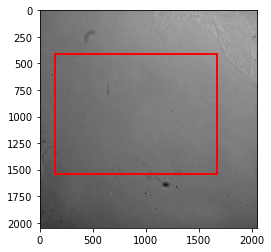

Would You Like to Calibrate Using this ROI? (Yes/No): 	yes
Calculating Blacklevel ...
Blacklevel: 136.99422481831226

Calibrating State0 (Extinction)...

Starting first grid search, step = 0.1
update (65535.000000, 0.010000, 0.250000)
update (51738.872581, 0.310000, 0.550000)
update (32606.617924, 0.310000, 0.650000)
coarse search done
better lca = 0.31000000000000005
better lcb = 0.6499999999999999
better int = 32606.617924015183
grid search done
lca = 0.31000000000000005
lcb = 0.6499999999999999
intensity = 32606.617924015183

Starting fine search
	Optimize lca ...
	lca = 0.2955
	lcb = 0.6500
	Intensity = 30511.1265073138
	Intensity Difference = 22171.8341213%

	Optimize lcb ...
	lca = 0.2955
	lcb = 0.5901
	Intensity = 5329.352764662315
	Intensity Difference = 3790.2025043%

	Begin Finer Search

	Optimize lca ...
	lca = 0.2911
	lcb = 0.5901
	Intensity = 5093.586395986668
	Intensity Difference = 3618.1030096%

	Optimize lcb ...
	lca = 0.2911
	lcb = 0.5899
	Intensity = 5092.31432787112

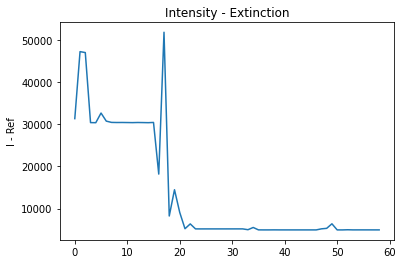

--------done--------


Calibrating State1 (I0)...
setting LCA = 0.2611
setting LCB = 0.5899


Intensity = 15538.069934152663
--------done--------

Calibrating State2 (I45)...
	Optimize lcb ...
	lca = 0.2911
	lcb = 0.5618
	Intensity = 31345.646249363515
	Intensity Difference = 101.7344907%
setting LCA = 0.2911
setting LCB = 0.5618




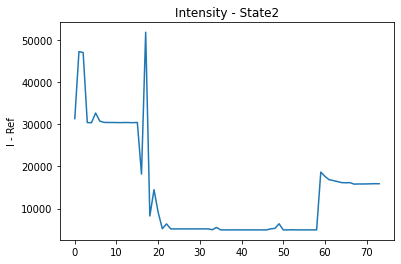

--------done--------

Calibrating State3 (I90)...
	Optimize lca ...
	lca = 0.3205
	lcb = 0.5899
	Intensity = 15545.207273873997
	Intensity Difference = 0.0459345%
setting LCA = 0.3205
setting LCB = 0.5899




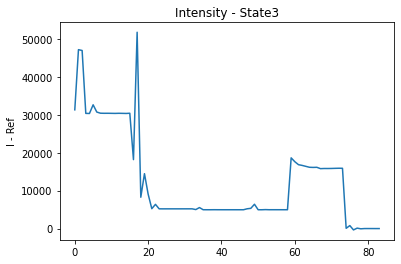

--------done--------

Calibrating State4 (I135)...
	Optimize lcb ...
	lca = 0.2911
	lcb = 0.6195
	Intensity = 15545.004854649816
	Intensity Difference = 0.0446318%
setting LCA = 0.2911
setting LCB = 0.6195




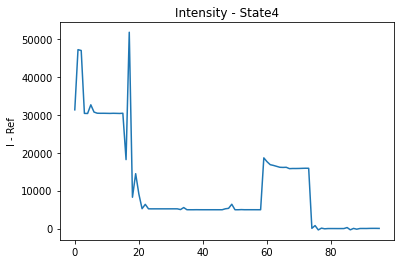

--------done--------

=======Finished Calibration=======

EXTINCTION = 360.9099929042449
Wall time: 37 s


In [3]:
%%time

# calibration_scheme = '4-State Extinction'
calibration_scheme = '5-State'
swing = 0.03
wavelength = 546
use_full_FOV = False
method = 'min_scalar'

meta_dir = 'Q:\\Cameron\\2021_03_24_CM_63x_04NA_CalTest\\Min_Scalar\\'

# Run Calibration
calib.run_calibration(calibration_scheme, options=(swing, wavelength, meta_dir, method, use_full_FOV))

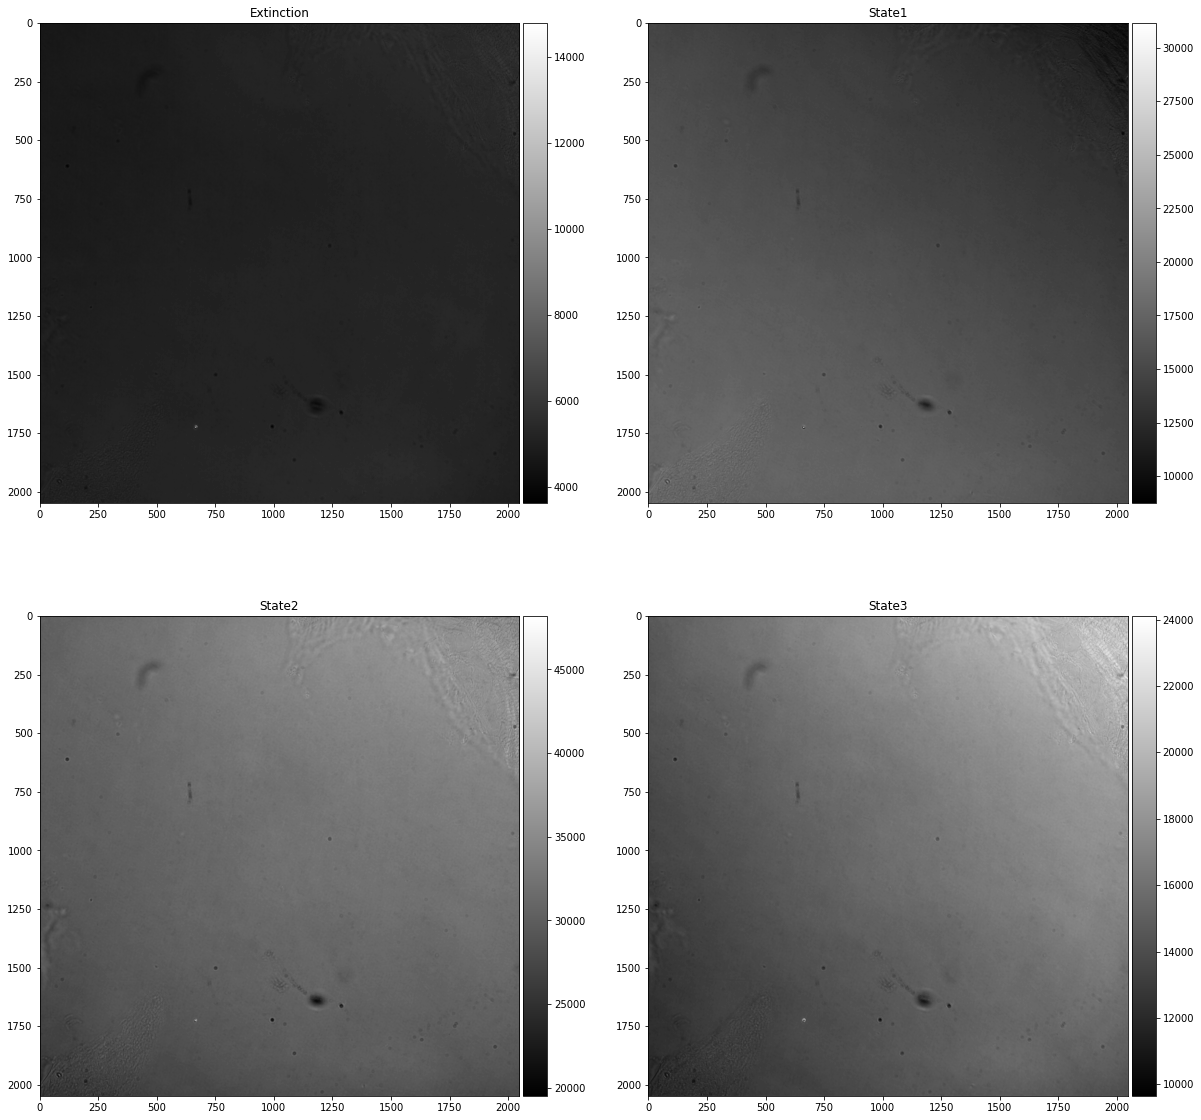

In [4]:
## Take set of BG Images

directory = 'Q:\\Cameron\\2021_03_24_CM_63x_04NA_CalTest\\Min_Scalar\\BG_5State\\'

n_avg = 10

if calibration_scheme == '5-State':
    calib.capture_bg(n_avg, 5, directory)

elif calibration_scheme == '4-State Extinction':
    calib.capture_bg(n_avg, 4, directory)